## Assignment 1 - Classification
##### Negin Baghbanzadeh


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('default_of_credit_card_clients.xls', index_col=0, header=1)

In [4]:
df_explore = df.copy()

# Part 1

In [5]:
df.shape

(30000, 24)

In [6]:
df_explore.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [7]:
df_explore.sample(10, random_state=0)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
8226,20000,1,1,2,33,1,2,2,2,2,...,18453,19755,19288,0,2260,0,1600,0,644,0
10795,20000,2,2,2,35,0,0,2,0,0,...,19000,19000,20000,3400,0,1000,0,1000,0,0
9164,230000,2,1,1,44,1,-1,-1,-1,-1,...,933,0,0,949,2873,933,0,0,0,0
26592,100000,1,2,1,42,0,0,0,0,0,...,17758,18774,20272,5000,2000,2000,2000,2000,2000,0
6632,150000,1,1,2,29,-2,-2,-2,-2,-2,...,6469,5138,7810,6989,833,6488,5153,7833,7130,0
14162,50000,1,2,2,25,-1,3,2,0,0,...,9993,15300,0,0,0,200,5307,0,0,1
253,140000,2,2,2,26,0,0,0,0,0,...,105334,107699,106828,5366,5087,3605,3894,3785,3304,1
2567,280000,1,1,2,31,1,-1,-1,0,0,...,2001,-339,-1180,3495,2783,0,0,0,0,0
3479,500000,2,1,2,36,-1,-1,-1,-1,-1,...,3338,1224,31022,4081,4283,3338,1224,31022,1088,0


we can sort the variables by data type. First, we will create four lists containing just the variable names:
1. A list which contains just our dependent variable.


2. A list containing categorical variables (variables which represent non-numeric values).


3. A list containing discrete variables (variables that are limited to whole number values).


4. A list containing continuous variables (variables that can represent decimal values).

In [8]:
dep_var = ["default payment next month"]
TARGET = "default payment next month"

columns_predictors = [col for col in df.columns if col not in [TARGET]]
columns_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]

There is no null data as you can see in below.

In [9]:
df_explore.isna().any()

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [10]:
df_explore["PAY_0"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [11]:
df_explore["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
df_explore["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

For `MARRIAGE`, 0 is invalid so we will replace it with 3 and consider it as others. For `EDUCATION` 5 and 6 are invalid, we will replave them with 4 and consider it as others.<br/>
For `PAY` -2 is invalid, since there is no categories as others and we can not put it in any other pre defiened categories(from -1 to 9), we will replace it with NaN and remove this data.

In [13]:
pays = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
df_explore[pays] = df_explore[pays].replace(-2.0, np.nan)

In [14]:
df_explore["MARRIAGE"].replace(0, 3, inplace=True)

In [15]:
df_explore["EDUCATION"].replace(5, 4, inplace=True)
df_explore["EDUCATION"].replace(6, 4, inplace=True)

In [16]:
df_explore.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2.0,2.0,-1.0,-1.0,NaN,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1.0,2.0,0.0,0.0,0.0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0.0,0.0,0.0,0.0,0.0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0.0,0.0,0.0,0.0,0.0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
df_explore.isna().any()

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                          True
PAY_2                          True
PAY_3                          True
PAY_4                          True
PAY_5                          True
PAY_6                          True
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [18]:
df_explore.dropna(inplace=True)

In [19]:
df_explore.isna().any()

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

## Quantitative features
We are looking at our quantitative (numerical) features. We'll use `DataFrame.describe()` to see some summary statistics of each numeric column.

In [20]:
df_explore.loc[:, dep_var + columns_categorical + columns_numerical].describe()

,default payment next month,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,23439.000000,23439.000000,23439.000000,23439.000000,23439.000000,23439.000000,23439.000000,23439.000000,23439.000000,23439.000000,...,23439.000000,23439.000000,23439.000000,23439.000000,23439.000000,2.343900e+04,23439.000000,23439.000000,23439.000000,23439.000000
mean,0.229745,1.592389,1.875123,1.565553,0.179743,0.186953,0.171850,0.131106,0.089850,0.085968,...,57637.414565,53489.969111,49950.984385,48003.792525,6080.117283,6.150067e+03,5595.474978,5093.421562,5069.011093,5383.728316
std,0.420678,0.491401,0.730858,0.521859,0.983344,1.031809,1.019224,0.985476,0.938341,0.946422,...,72638.492147,68234.702862,64470.639768,63176.841184,16871.904369,2.030415e+04,18174.380056,15507.591825,15029.761344,17464.417787
min,0.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-157264.000000,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10319.000000,9952.500000,9255.000000,7698.000000,1410.000000,1.339500e+03,1000.000000,746.500000,716.500000,628.000000
50%,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30477.000000,28360.000000,26499.000000,25070.000000,2600.000000,2.500000e+03,2000.000000,2000.000000,2000.000000,2000.000000
75%,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,76092.000000,70584.500000,65711.000000,62517.500000,5500.000000,5.200000e+03,5000.000000,4746.000000,4686.000000,4513.500000
max,1.000000,2.000000,4.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000


## Dependent variables
`default payment next month` is our dependent variable. we'll use the `seaborn` `histplot` function to view the price distribution.
Almost 77% of our data made the next month payment default and 23% didn't. 

<AxesSubplot:xlabel='default payment next month', ylabel='Probability'>

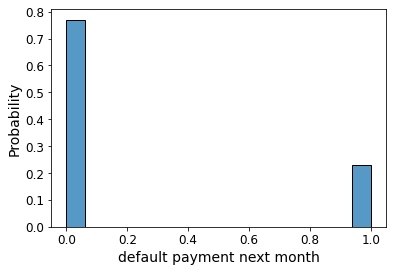

In [21]:
sns.histplot(df_explore["default payment next month"], stat="probability")

## Independent variables
We can again use the `seaborn` `distplot` to examine each of these distributions individually, or we can write a bit of code to lay out all of the distributions in a grid. We can also take advantage of the `pandas` plotting function `DataFrame.hist()` to create a grid view.

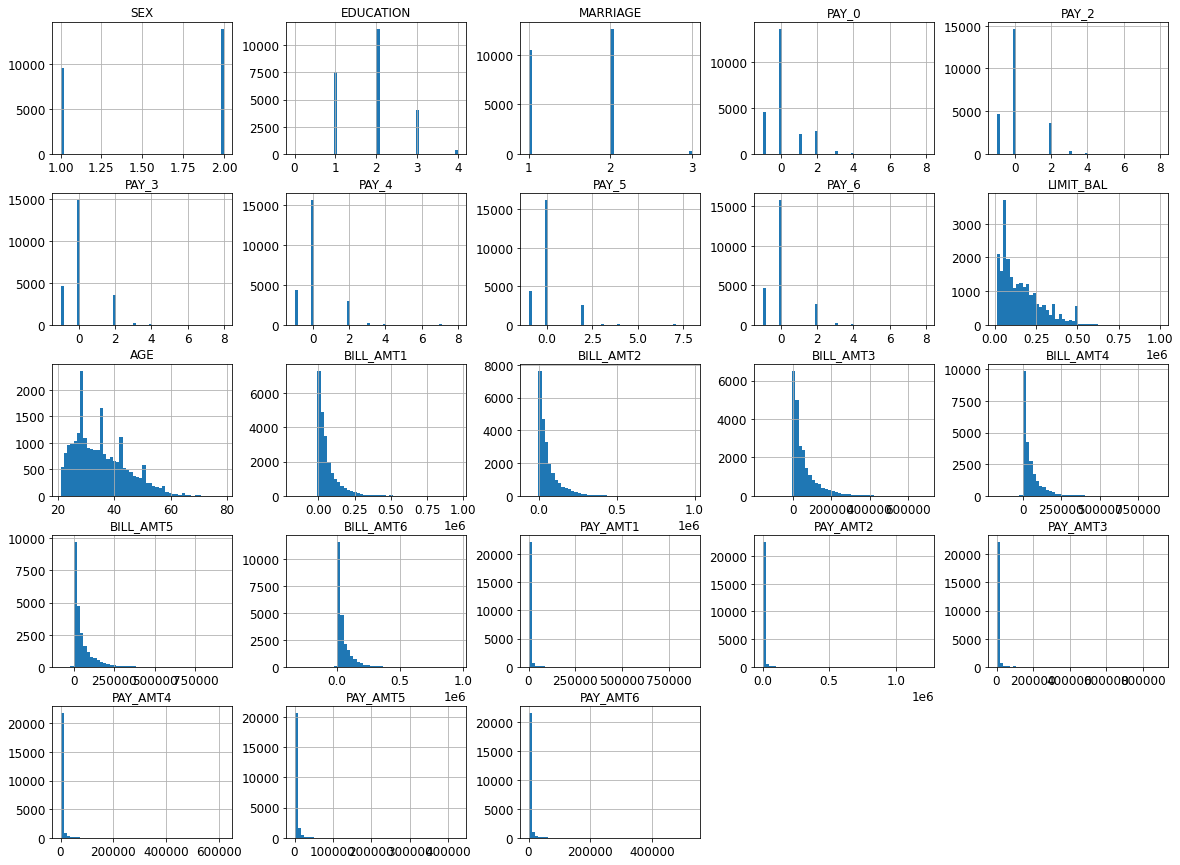

In [22]:
df_explore.loc[:, columns_categorical + columns_numerical].hist(bins=50, figsize=(20,15))
plt.show()

# Correlation Analysis

We can look at basic correlations with `DataFrame.corr()` and select the correlations with `default payment next month`. We will use the default Pearson correlation coefficient.

In [23]:
corr_matrix = df_explore.loc[:, ['default payment next month'] + columns_numerical].corr(method='pearson')
corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
AGE                           0.009817
BILL_AMT6                    -0.014248
BILL_AMT5                    -0.016287
BILL_AMT4                    -0.021107
BILL_AMT3                    -0.025755
BILL_AMT2                    -0.026802
BILL_AMT1                    -0.032742
PAY_AMT6                     -0.046954
PAY_AMT3                     -0.057055
PAY_AMT5                     -0.057947
PAY_AMT4                     -0.059189
PAY_AMT2                     -0.067406
PAY_AMT1                     -0.074960
LIMIT_BAL                    -0.172970
Name: default payment next month, dtype: float64

In [24]:
corr_matrix = df_explore.loc[:, ['default payment next month'] + columns_categorical].corr(method='pearson')
corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
PAY_0                         0.384615
PAY_2                         0.331574
PAY_3                         0.299977
PAY_4                         0.282401
PAY_5                         0.273258
PAY_6                         0.255590
EDUCATION                     0.038226
MARRIAGE                     -0.030999
SEX                          -0.039424
Name: default payment next month, dtype: float64

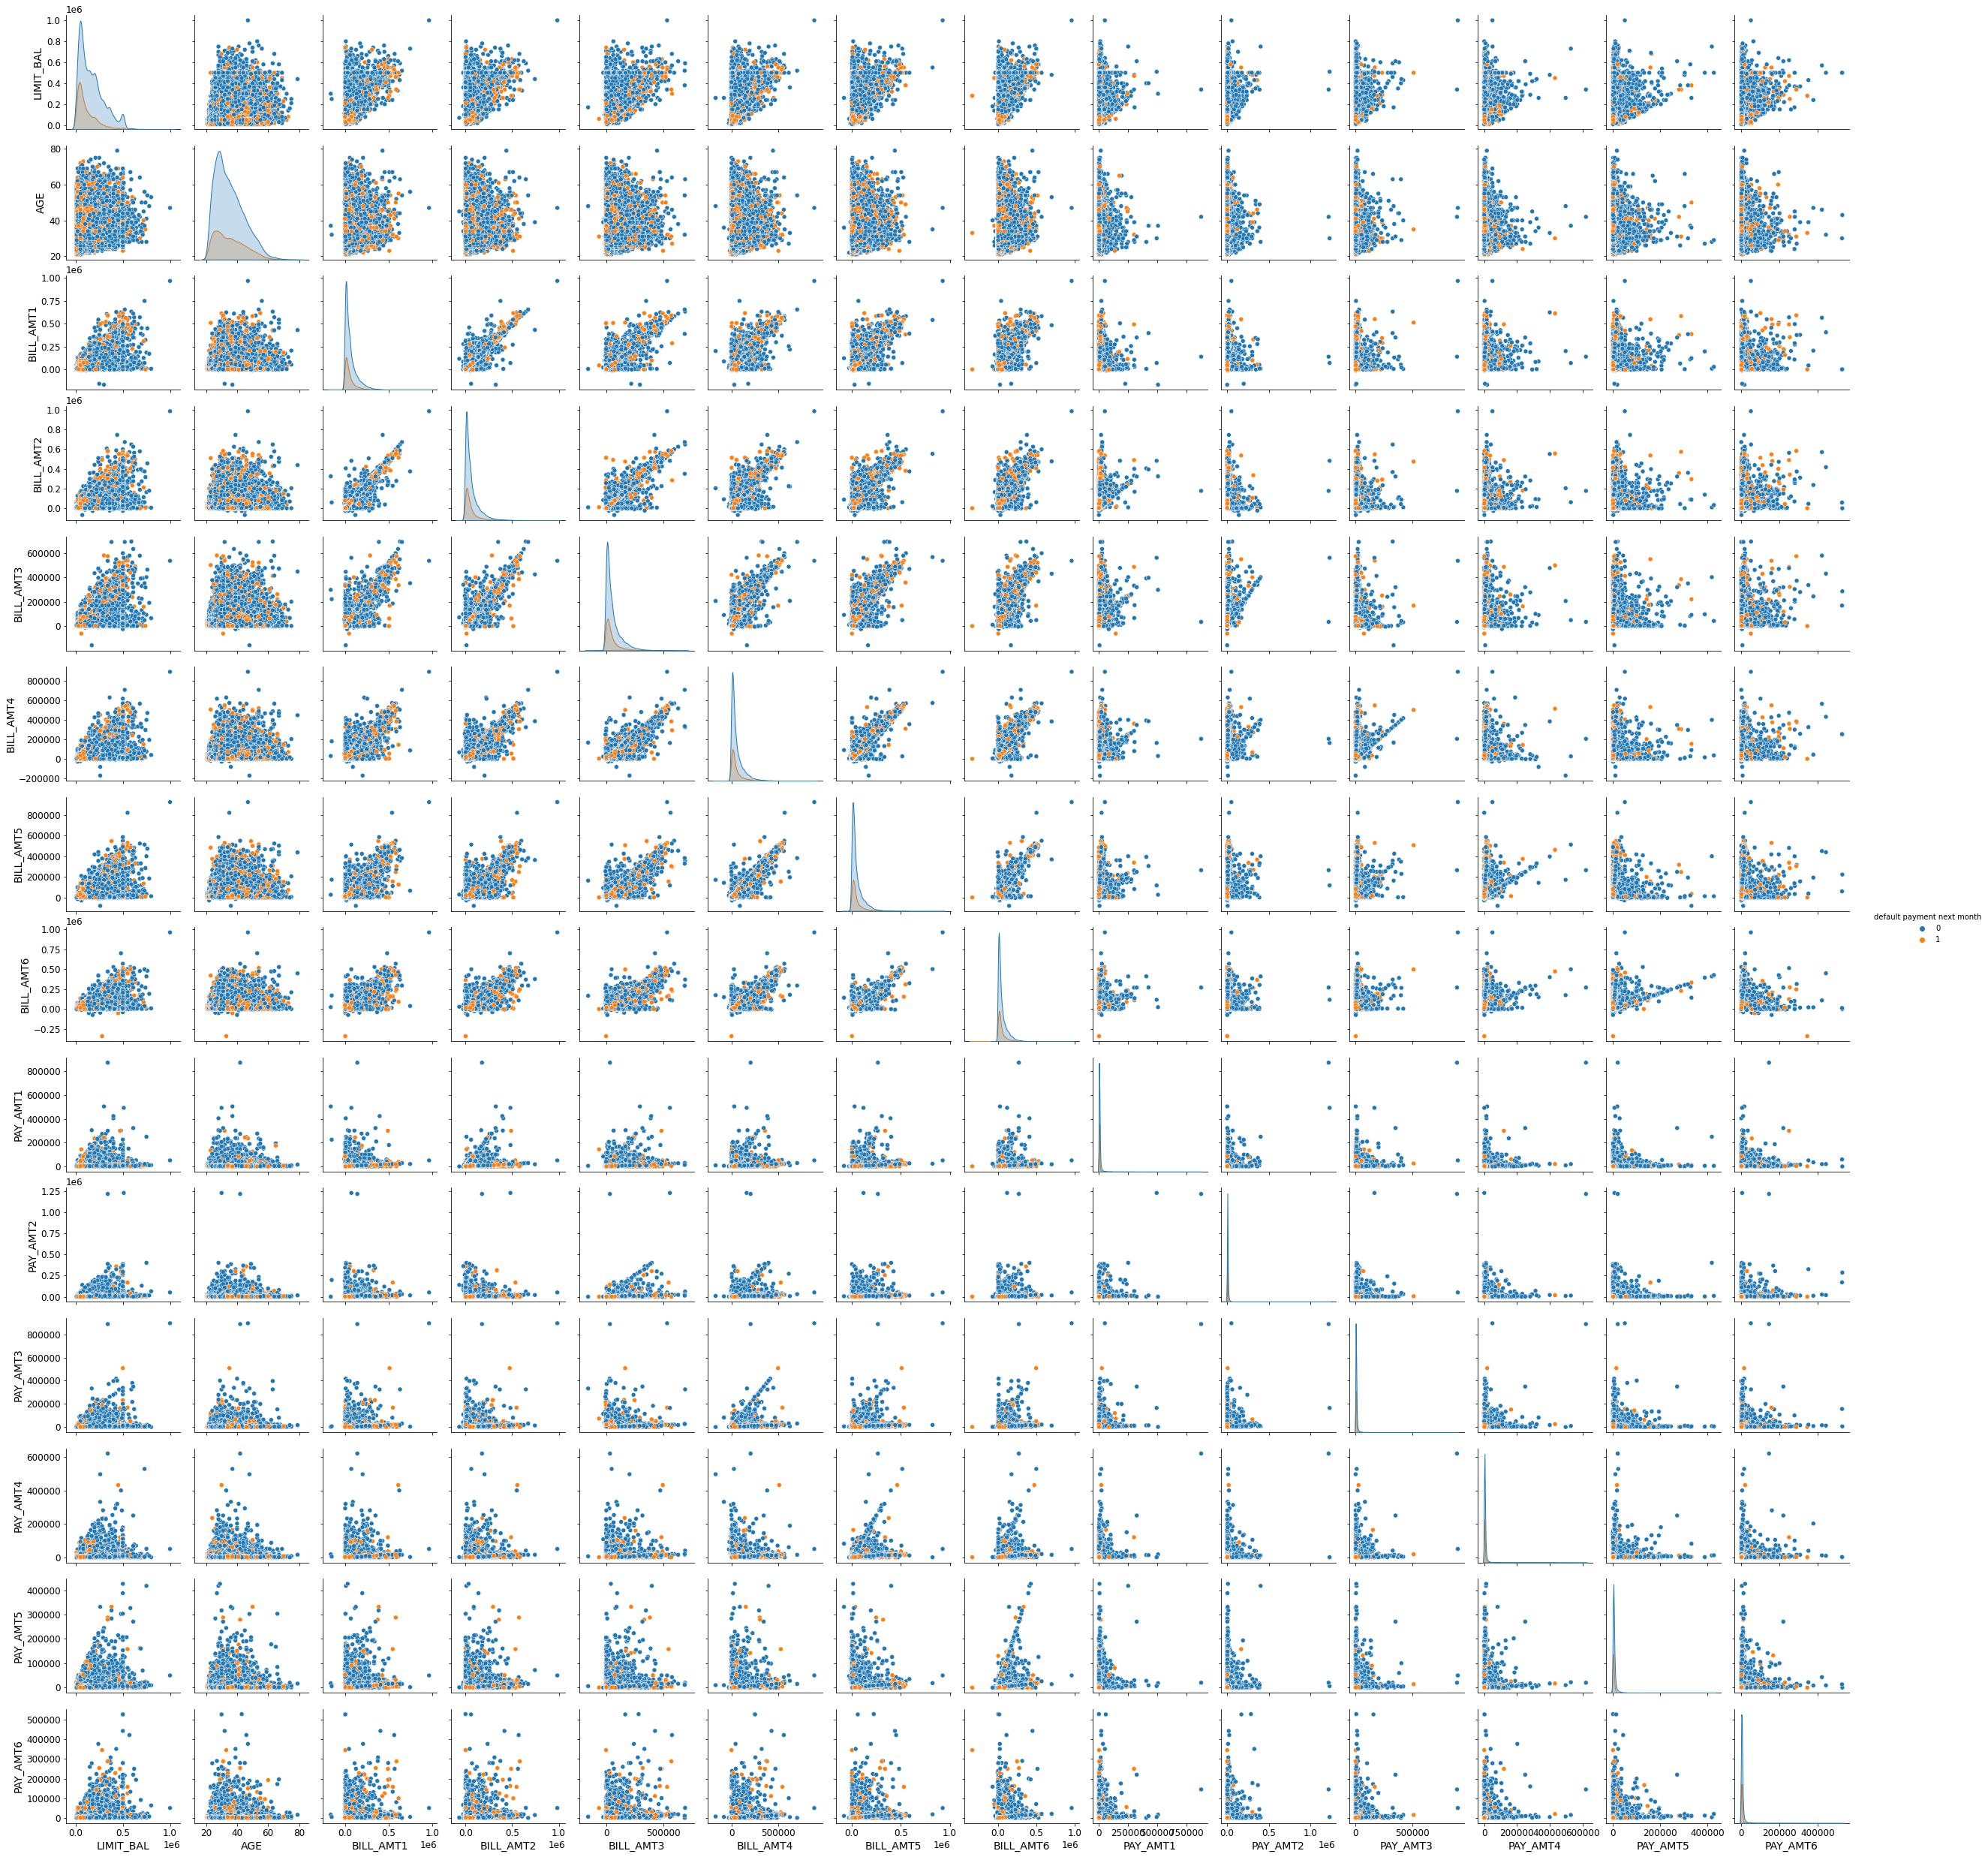

In [25]:
sns.pairplot(data=df_explore.loc[:, ['default payment next month'] + columns_numerical], hue="default payment next month")
plt.show()

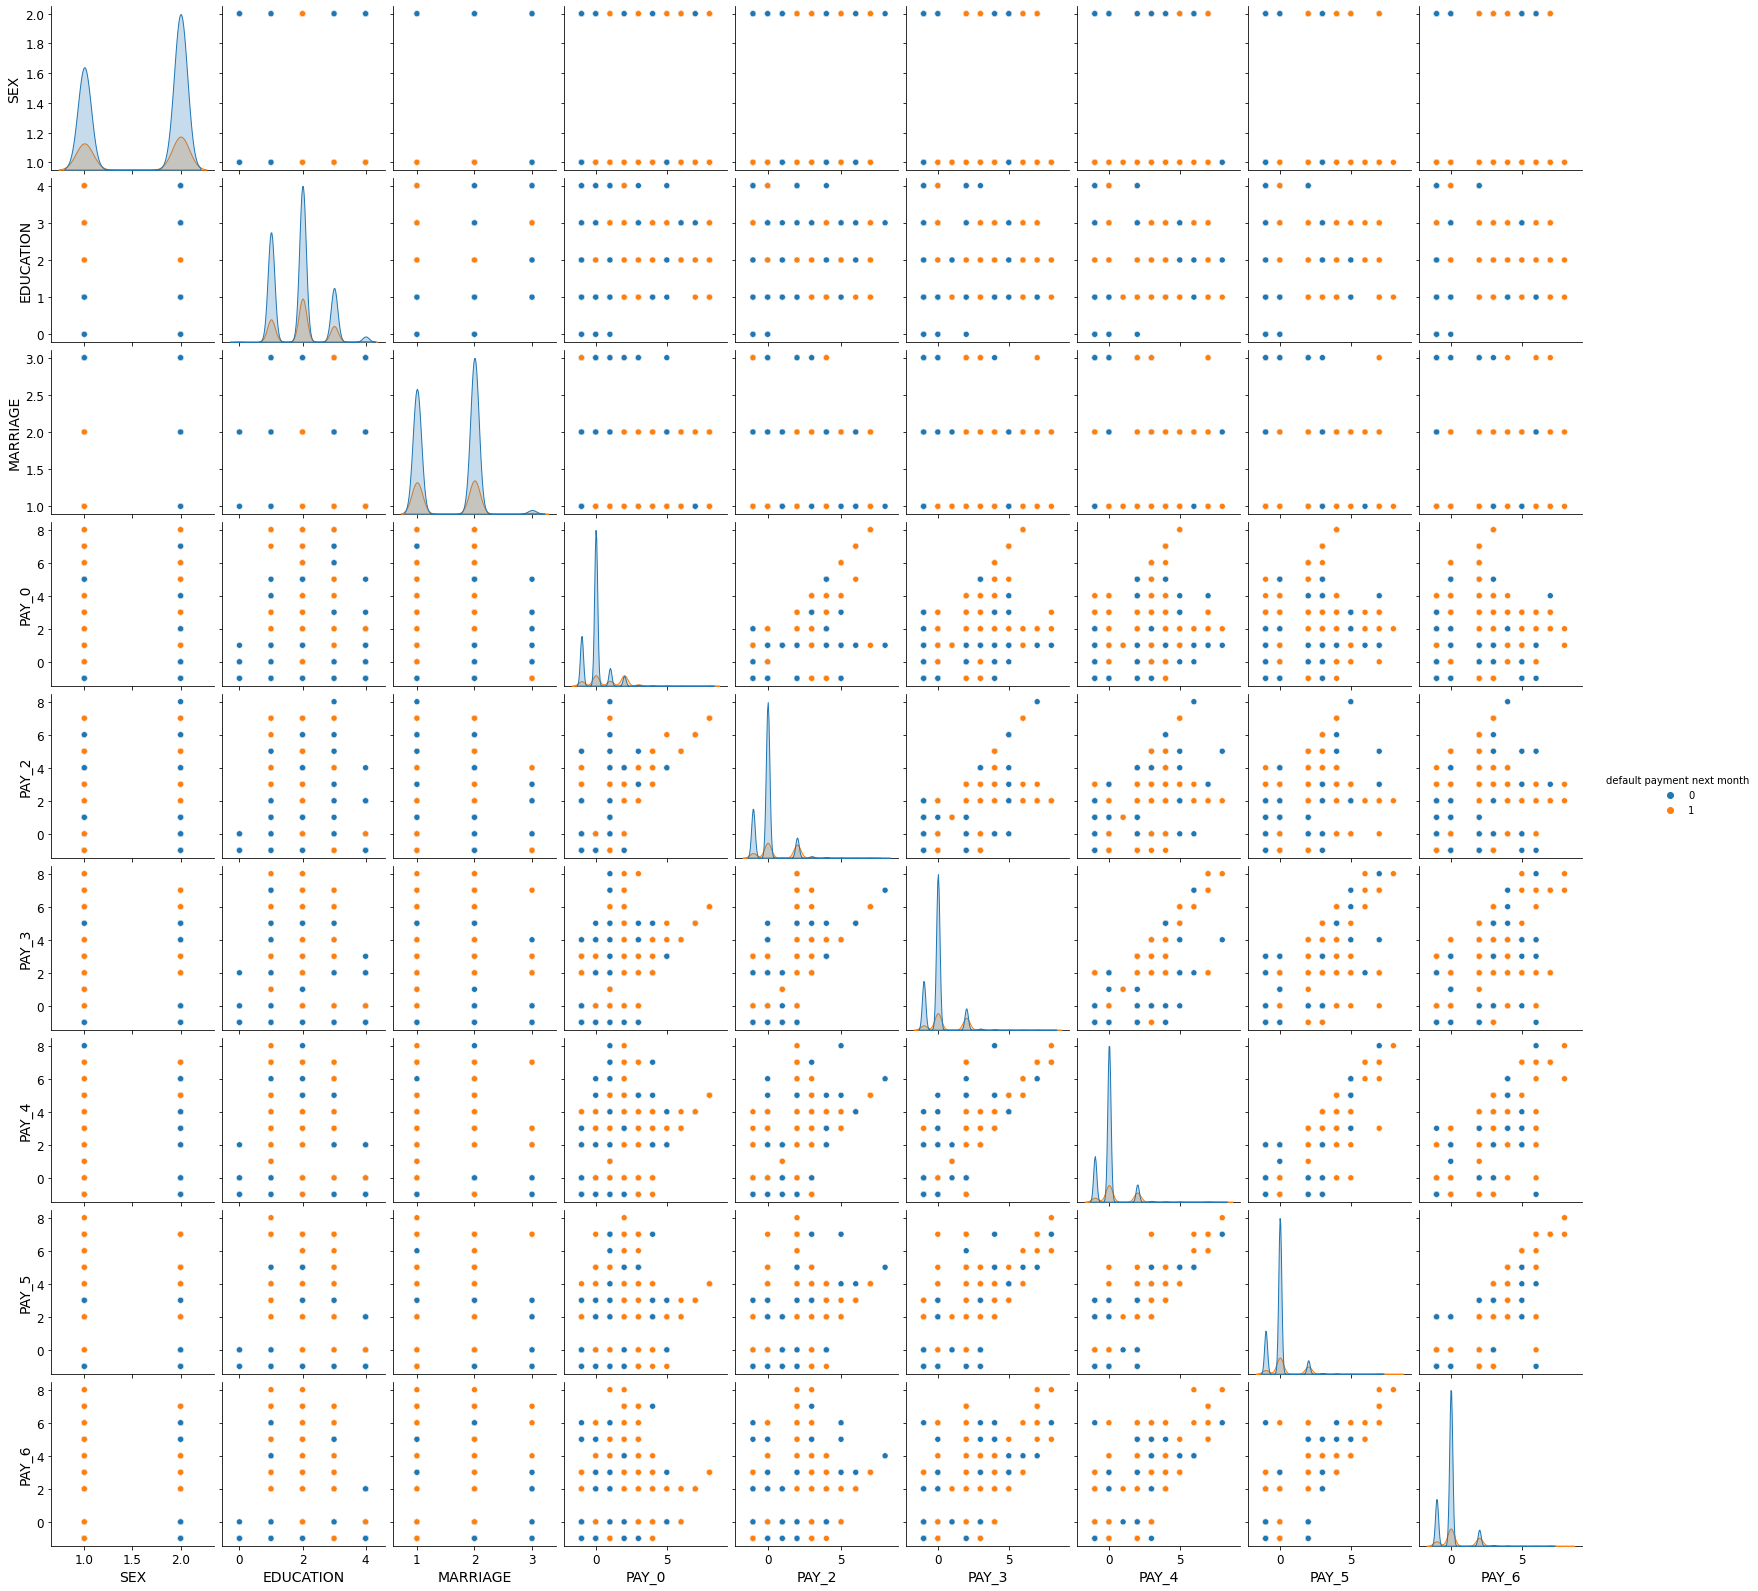

In [26]:
sns.pairplot(data=df_explore.loc[:, ['default payment next month'] + columns_categorical], hue="default payment next month")
plt.show()

# Part 2
## Pipeline
For the categorical columns, we will apply one hot encoding and for numerical columns we will apply normalization.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(handle_unknown="ignore")),
])

pipeline_numerical = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical),
  ("numerical", pipeline_numerical, columns_numerical),
])

In [28]:
X = df_explore[columns_predictors]
y = df_explore[TARGET]
display(X)
display(y)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
2,120000,2,2,2,26,-1.0,2.0,0.0,0.0,0.0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0.0,0.0,0.0,0.0,0.0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0.0,0.0,0.0,0.0,0.0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
6,50000,1,1,2,37,0.0,0.0,0.0,0.0,0.0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0.0,0.0,0.0,0.0,0.0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1.0,-1.0,-1.0,-1.0,0.0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4.0,3.0,2.0,-1.0,0.0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


ID
2        1
3        0
4        0
5        0
6        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 23439, dtype: int64

We will split the data in test and train and then do cross validation on X_train to improve model performance.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (18751, 23)
X_test.shape: (4688, 23)
y_train.shape: (18751,)
y_test.shape: (4688,)


We will select `neg_mean_squared_error` for scoring and keep in mind that we will have to take the negative and square root of the result to get  RMSE . The lower the  RMSE  is, the better our model is doing.

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:", np.sqrt(-scores).mean())
    print("Standard deviation:", np.sqrt(-scores).std())

rf_clf = RandomForestClassifier()
knn_clf =  KNeighborsClassifier()

print("RF:")
rf_scores = cross_val_score(rf_clf, X_train, np.ravel(y_train), cv=5, scoring='neg_mean_squared_error')
display_scores(rf_scores)

print("-----------------")
print("KNN:")

knn_scores = cross_val_score(knn_clf, X_train, np.ravel(y_train), cv=5, scoring='neg_mean_squared_error')
display_scores(knn_scores)

RF:
Scores: [0.42577575 0.42926293 0.43389707 0.42614552 0.42770706]
Mean: 0.4285576669863471
Standard deviation: 0.002942368838793051
-----------------
KNN:
Scores: [0.51140029 0.49986665 0.49152823 0.50438081 0.49933289]
Mean: 0.5013017733470665
Standard deviation: 0.006525623236737253


# Part 3

Now we are going to find the best value for the hyperparameters and do a cross validation again and compare the results.

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [4, 5, 10, 20, 50],
}

rf_grid_search = GridSearchCV(estimator=rf_clf, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

rf_grid_search.fit(X=X, y=np.ravel(y))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [4, 5, 10, 20, 50]},
             scoring='roc_auc')

In [35]:
print(rf_grid_search.best_params_)
print("\n",rf_grid_search.best_estimator_)

{'n_estimators': 50}

 RandomForestClassifier(n_estimators=50)


In [36]:
param_grid = {
    'n_neighbors': [3, 5, 10, 20],
}

knn_grid_search = GridSearchCV(estimator=knn_clf, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

knn_grid_search.fit(X=X, y=np.ravel(y))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20]}, scoring='roc_auc')

In [37]:
print(knn_grid_search.best_params_)
print("\n",knn_grid_search.best_estimator_)

{'n_neighbors': 20}

 KNeighborsClassifier(n_neighbors=20)


In [38]:
final_rf_model = rf_grid_search.best_estimator_
final_knn_model = knn_grid_search.best_estimator_

print("RF:")
rf_scores = cross_val_score(final_rf_model, X_train, np.ravel(y_train), cv=5, scoring='neg_mean_squared_error')
display_scores(rf_scores)

print("-----------------")
print("KNN:")

knn_scores = cross_val_score(final_knn_model, X_train, np.ravel(y_train), cv=5, scoring='neg_mean_squared_error')
display_scores(knn_scores)

RF:
Scores: [0.42577575 0.42645828 0.43573692 0.43358967 0.43050358]
Mean: 0.4304128413246893
Standard deviation: 0.0038881216508947778
-----------------
KNN:
Scores: [0.4829815  0.47272261 0.47525432 0.48194052 0.47916594]
Mean: 0.47841297816570316
Standard deviation: 0.0039048511467686935


#### Conclusions

As you can see, after choosing the best hyperparameter for KNN model, the mean score of CV is decreased which shows that the model is improved.(The default value for neighbours is 5 but the best hyperparameter in our `GridSearchCV` was 20 and the `GridSearchCV` showed 20 is better than 5 for this data and model)<br/>
But for the RF model, the mean score is increased which means the model's worsen. The reason is that the default value of estimators is 100 but our choices in `GridSearchCV` didn't have 100 in it, if we add 100 to the list, it will show that 100 is the best choice.(below)

In [40]:
param_grid = {
    'n_estimators': [4, 5, 10, 20, 50, 100],
}

rf_grid_search = GridSearchCV(estimator=rf_clf, 
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)

rf_grid_search.fit(X=X, y=np.ravel(y))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [4, 5, 10, 20, 50, 100]},
             scoring='roc_auc')

In [41]:
print(rf_grid_search.best_params_)
print("\n",rf_grid_search.best_estimator_)

{'n_estimators': 100}

 RandomForestClassifier()
